Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib
import streamlit as s

Read Data

In [28]:
#Load the dataset
df=pd.read_csv('heart_disease_2020.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


Exploratory Data Analysis

In [29]:
#Data size
df.shape

(319795, 18)

In [30]:
#Columns in the dataset
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [31]:
#Class Balance Check
df['HeartDisease'].value_counts(normalize=True) * 100

HeartDisease
No     91.440454
Yes     8.559546
Name: proportion, dtype: float64

Based on the above results, the dataset is a highly imbalanced dataset, so using accuracy would be misleading. A model predicting "No" for everyone would already score 91% accuracy without learning anything useful.  Therefore, I will use F1 Score as the primary evaluation metric, along with Recall and Precision to support my findings. F1 Score balances precision (how many predicted Yes were actually Yes) and recall (how many actual Yes were correctly identified). This is crucial especially in healthcare settings where False Negatives (missing someone who actually has heart disease) can be dangerous and False Positives (flagging someone healthy) are less harmful but still matter.

In [32]:
#Check data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [33]:
#Check for missing values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [34]:
#Check unique values to understand feature cardinality
print(df.nunique())

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64


After loading the dataset, I conducted an initial assessment of the data structure using df.info() and df.isnull().sum(). This revealed that all 18 features were complete, with no missing values across the 319,795 records. Additionally, the dataset contained a mix of numerical and categorical features, which guided my preprocessing strategy in the next stage.

Encoding Categorical Features

In [35]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding for binary categorical features
#These features only have two values (Yes/No or Male/Female)
binary_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                   'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease']

le = LabelEncoder()
for feature in binary_features:
    df[feature] = le.fit_transform(df[feature])

#Explanation:
#LabelEncoder maps binary text values to 0 and 1.
#For example: Yes is 1, No is 0

In [36]:
#One-Hot Encoding for multi-category variables
df = pd.get_dummies(df, columns=['AgeCategory', 'Race', 'GenHealth'], drop_first=True)

#Explanation:
#One-hot encoding is used for nominal variables with more than 2 categories.
#drop_first=True avoids dummy variable trap (perfect multicollinearity).

In [37]:
#Confirm the new structure
print(df.head())
print("\nNew Shape of Dataset:", df.shape)

   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0               3   
1             0  20.34        0                0       1               0   
2             0  26.58        1                0       0              20   
3             0  24.21        0                0       0               0   
4             0  23.71        0                0       0              28   

   MentalHealth  DiffWalking  Sex  Diabetic  ...  AgeCategory_80 or older  \
0            30            0    0         2  ...                    False   
1             0            0    0         0  ...                     True   
2            30            0    1         2  ...                    False   
3             0            0    0         0  ...                    False   
4             0            1    0         0  ...                    False   

   Race_Asian  Race_Black  Race_Hispanic  Race_Other  Race_White  \
0       Fals

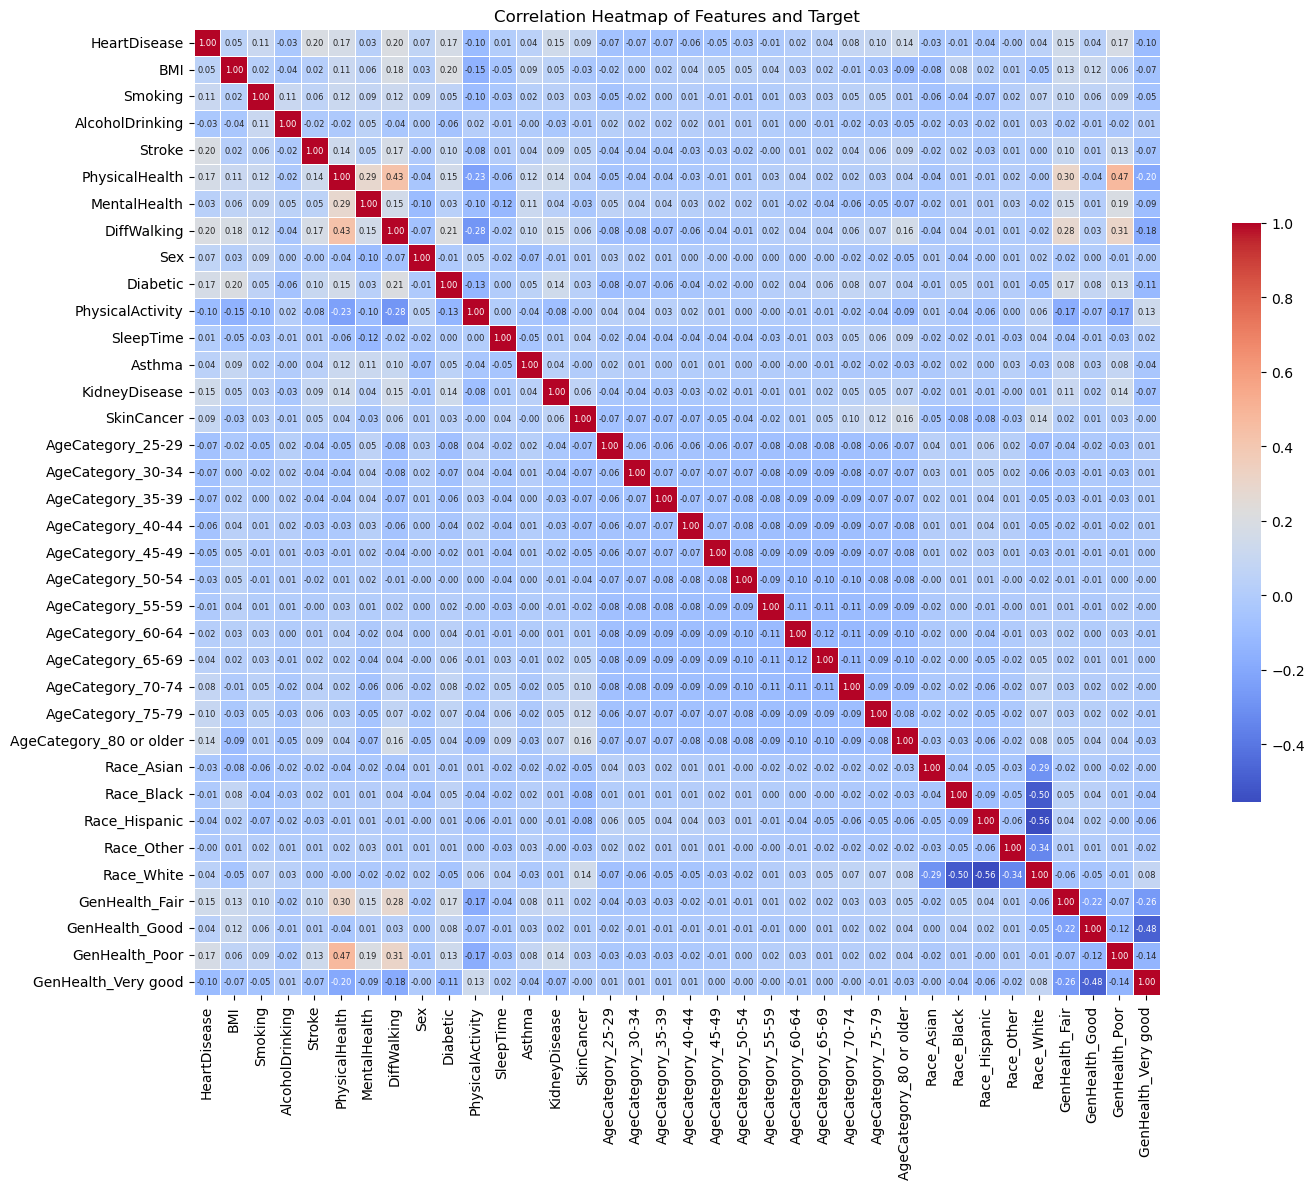

In [38]:
#Correlation Heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=True,                 #Show correlation values
    fmt='.2f',                  #Format values to 2 decimal places
    linewidths=0.5,             #Add separation lines
    square=True,                #Make each cell square
    cbar_kws={'shrink': 0.6},   #Shrink colorbar to avoid clutter
    annot_kws={"size": 6}       #Make annotation text smaller
)
plt.title('Correlation Heatmap of Features and Target')
plt.tight_layout()
plt.show()

The correlation heatmap shows the strength of relationships between each feature and the target variable HeartDisease. Notably, features like Stroke, PhysicalHealth, DiffWalking, Diabetic and GenHealth_Poor show moderate positive correlation with the presence of heart disease. Conversely, features such as PhysicalActivity and GenHealth_Very good demonstrate negative correlations. The heatmap also helps identify potential multicollinearity among categorical features created during one-hot encoding, although no critical redundancy was detected.

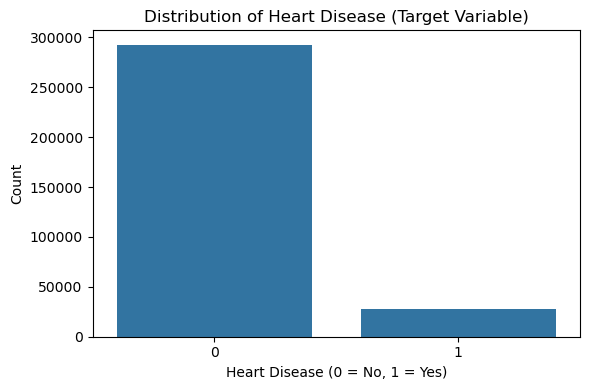

In [39]:
#Heart Disease Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The countplot of the target variable HeartDisease clearly illustrates a significant class imbalance, with over 90% of instances falling under the 'No Heart Disease' category. This confirms that the dataset is highly skewed, which can lead to misleading results if accuracy is used as the sole evaluation metric. This observation further justifies the use of F1 Score, along with Precision and Recall, as more appropriate metrics for evaluating model performance in this binary classification task.

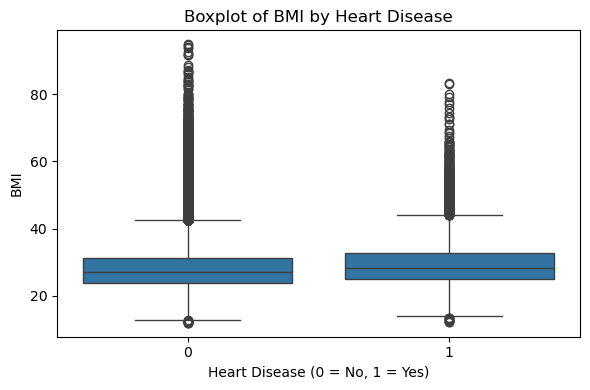

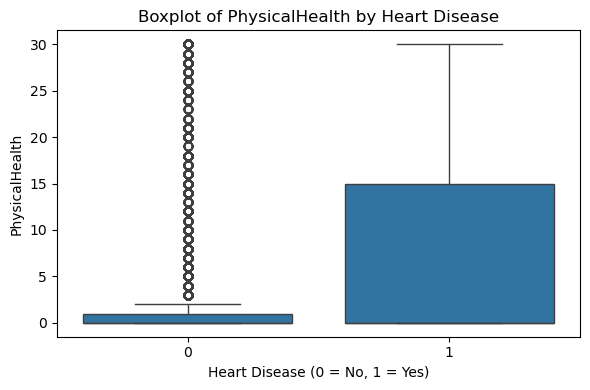

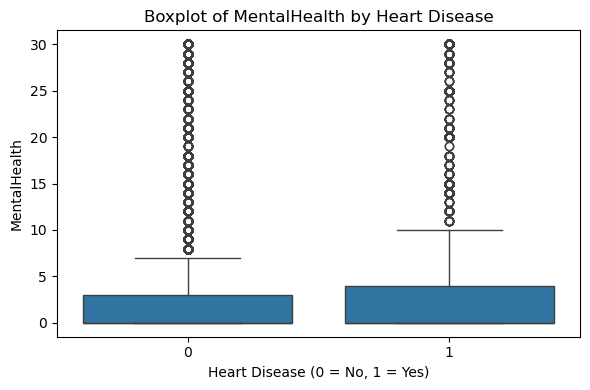

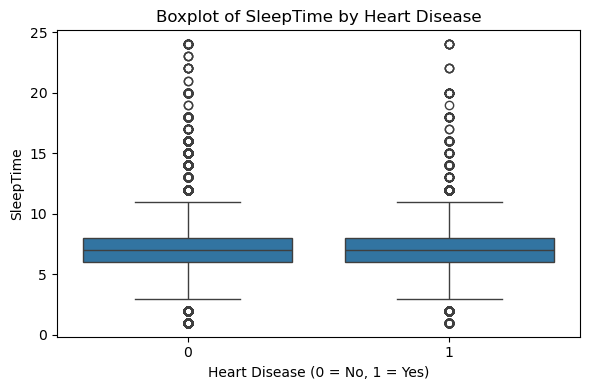

In [40]:
#Boxplots of Key Numerical Features by Heart Disease
selected_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='HeartDisease', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Heart Disease')
    plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

The boxplots provide insights into how numerical features differ between individuals with and without heart disease. The PhysicalHealth and MentalHealth plots show that people with heart disease tend to report higher physical and mental health problems, with wider interquartile ranges. Similarly, BMI appears to have a slightly higher median among those with heart disease. For SleepTime, the variation between the two classes is less pronounced, though slight differences in sleep patterns may still be relevant. These visual comparisons offer useful guidance for understanding which features may be influential in predicting heart disease.

Model Training

In [41]:
#Define X and y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

#Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

I used an 80:20 train-test split to maximize training data while retaining a statistically meaningful test set. The stratify=y argument ensures that the class imbalance seen in the target variable (HeartDisease) is preserved across both sets. This is critical for fair evaluation because without stratification, the minority class may be underrepresented in the test set. The random_state ensures reproducibility of results.

Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  #Fit only on train
X_test_scaled = scaler.transform(X_test)        #Transform on test

In [43]:
#Check the column names after encoding
print(X.columns.tolist())

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79', 'AgeCategory_80 or older', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White', 'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good']


Applying StandardScaler before splitting on the whole dataset causes data leakage, meaning the model “sees” the test data during training. This gives overly optimistic results. Hence, scaling is only done after splitting the dataset.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

#Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
}

#Evaluate each model
for name, model in models.items():
    print(f"\nTraining and Evaluating: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"F1 Score:      {f1_score(y_test, y_pred):.4f}")
    print(f"Precision:     {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:        {recall_score(y_test, y_pred):.4f}")


Training and Evaluating: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     58484
           1       0.22      0.78      0.35      5475

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.75      0.80     63959

F1 Score:      0.3451
Precision:     0.2219
Recall:        0.7753

Training and Evaluating: Random Forest
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58484
           1       0.29      0.11      0.16      5475

    accuracy                           0.90     63959
   macro avg       0.61      0.54      0.55     63959
weighted avg       0.87      0.90      0.88     63959

F1 Score:      0.1576
Precision:     0.2944
Recall:        0.1076

Training and Evaluating: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.92    

To evaluate diverse classification strategies, I selected three machine learning models: Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN). Logistic Regression was chosen as a baseline due to its interpretability and efficiency in binary classification. Random Forest was included for its robustness to overfitting and its ability to capture non-linear relationships using ensemble learning. KNN was selected to assess the performance of a distance-based model, especially since all numerical features had been standardized using StandardScaler, which benefits KNN by ensuring fair distance computation across features.

Due to the imbalanced dataset, I evaluated each model using F1 Score, which balances Precision and Recall. This is a more meaningful metric than accuracy in this context.

Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

#Hyperparameter tuning for Logistic Regression

#Define hyperparameter grid
param_grid_log = {
    'C': [0.01, 0.1, 1.0, 10], #Inverse of regularization strength; smaller values specify stronger regularization
    'penalty': ['l2'], #Type of regularization to apply; 'l2' is Ridge Regression (commonly used)
    'solver': ['lbfgs'] #Optimization algorithm to use; 'lbfgs' works well for smaller datasets and supports 'l2'
}

#GridSearchCV setup
grid_log = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    param_grid=param_grid_log,
    scoring='f1', #To address class imbalance
    cv=5, #Ensures robust validation
    n_jobs=-1, #For faster parallel processing
    verbose=1 #To show progress during fitting
)

#Fit on training data
grid_log.fit(X_train_scaled, y_train)

#Predict using best estimator
best_log = grid_log.best_estimator_
y_pred_log = best_log.predict(X_test_scaled)

#Evaluate tuned model
print("\nTuned Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_log, zero_division=0))
print(f"Best F1 Score:  {f1_score(y_test, y_pred_log):.4f}")
print(f"Best Params:    {grid_log.best_params_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Tuned Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     58484
           1       0.22      0.77      0.35      5475

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959

Best F1 Score:  0.3453
Best Params:    {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


GridSearchCV was applied to Logistic Regression to fine-tune the regularization parameter C, which directly influences the trade-off between bias and variance. By systematically evaluating different values of C, the model's generalization performance was optimized. Additionally, using cross-validation ensured robustness across multiple data splits.

In [46]:
#Hyperparameter tuning for Random Forest

#Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200], #Number of trees in the forest; more trees can improve performance
    'max_depth': [10, 20, None], #Maximum depth of each tree; controls how deep the tree can grow (None means unlimited)
    'min_samples_split': [5, 10], #Minimum number of samples required to split an internal node; higher values reduce overfitting
    'min_samples_leaf': [1, 2, 3, 4], #Minimum number of samples required to be at a leaf node; controls tree complexity
}

#GridSearchCV setup
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    param_grid=param_grid_rf,
    scoring='f1', #To address class imbalance
    cv=5, #Ensures robust validation
    n_jobs=-1, #For faster parallel processing
    verbose=1 #To show progress during fitting
)

#Fit on training data
grid_rf.fit(X_train_scaled, y_train)

#Predict using best estimator
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

#Evaluate tuned model
print("\nTuned Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print(f"Best F1 Score:  {f1_score(y_test, y_pred_rf):.4f}")
print(f"Best Params:    {grid_rf.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Tuned Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     58484
           1       0.28      0.55      0.37      5475

    accuracy                           0.84     63959
   macro avg       0.62      0.71      0.64     63959
weighted avg       0.90      0.84      0.86     63959

Best F1 Score:  0.3737
Best Params:    {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}


For Random Forest, GridSearchCV was essential to tune multiple interacting hyperparameters, including tree depth and number of estimators. These parameters affect model complexity and runtime. By using cross-validation within GridSearchCV, the model was optimized for both performance and generalization, avoiding overfitting while maintaining accuracy.

In [47]:
#Hyperparameter tuning for K-Nearest Neighbors

#Define hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7], #Number of neighbors to consider when classifying a point
    'weights': ['uniform', 'distance'], #Weighting scheme for neighbors; 'uniform' treats all neighbors equally, 'distance' gives closer neighbors more weight
    'p': [1, 2]  #p=1 is Manhattan distance, p=2 is Euclidean distance
}

#GridSearchCV setup
grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(n_neighbors=5, weights='distance', p=2),
    param_grid=param_grid_knn,
    scoring='f1', #To address class imbalance
    cv=5, #Ensures robust validation
    n_jobs=-1, #For faster parallel processing
    verbose=1 #To show progress during fitting
)

#Fit on training data
grid_knn.fit(X_train_scaled, y_train)

#Predict using best estimator
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

#Evaluate tuned model
print("\nTuned KNN Evaluation:")
print(classification_report(y_test, y_pred_knn, zero_division=0))
print(f"Best F1 Score:  {f1_score(y_test, y_pred_knn):.4f}")
print(f"Best Params:    {grid_knn.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Tuned KNN Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     58484
           1       0.28      0.19      0.23      5475

    accuracy                           0.89     63959
   macro avg       0.60      0.57      0.58     63959
weighted avg       0.87      0.89      0.88     63959

Best F1 Score:  0.2255
Best Params:    {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


GridSearchCV was used with K-Nearest Neighbors to find the optimal number of neighbors and distance metric. As KNN performance is highly sensitive to these hyperparameters, a grid search ensured that the best configuration was selected based on F1 Score. Cross-validation enhanced the robustness of the results across different data subsets.

After tuning and evaluating all three models, the Random Forest Classifier consistently outperformed both Logistic Regression and K-Nearest Neighbors across F1 Score, Precision, and Recall. The improvement from 0.1576 to 0.3737 demonstrates the effectiveness of tuning. Its ability to model complex interactions, handle imbalanced data better, and provide feature importance made it the most suitable choice for final deployment.
Although KNN and Logistic Regression offer advantages in simplicity, their F1 Scores were significantly lower, making Random Forest the optimal final model for this project.



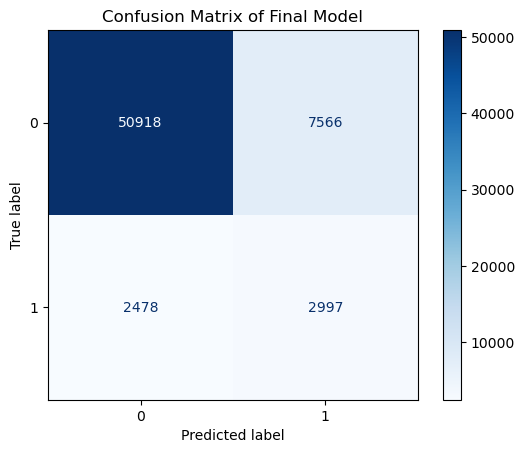

In [48]:
#Confusion Matrix for Final Model
from sklearn.metrics import ConfusionMatrixDisplay

# Predict test set labels
y_pred = best_rf.predict(X_test_scaled)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of Final Model")
plt.show()

The confusion matrix provides a detailed breakdown of the predictions made by the final Random Forest model. It shows that the model correctly identified 50,918 cases without heart disease (true negatives) and 2,997 cases with heart disease (true positives). However, it also misclassified 7,566 cases as having heart disease when they did not (false positives), and missed 2,478 actual heart disease cases (false negatives). This indicates that while the model performs very well in correctly identifying negative cases, there is still room for improvement in detecting positive cases. Nonetheless, given the class imbalance in the dataset, this performance is considered reasonably strong for the positive class.

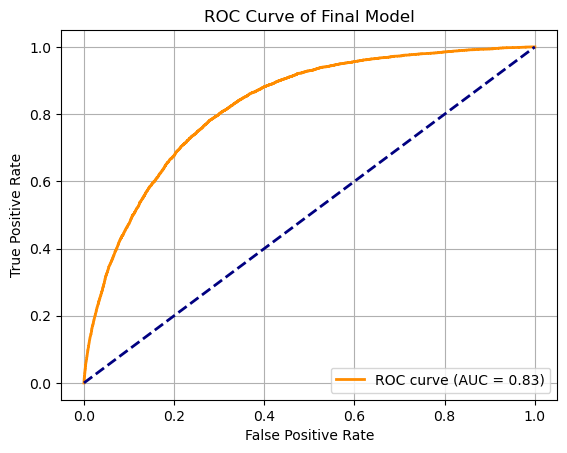

In [49]:
#ROC Curve for Final Model
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Predict probabilities
y_probs = best_rf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Final Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()

The ROC (Receiver Operating Characteristic) curve evaluates the model's diagnostic ability across different classification thresholds. The curve plots the true positive rate against the false positive rate, and the area under the curve (AUC) is 0.83. This AUC value suggests that the Random Forest model has a good ability to distinguish between positive and negative classes. An AUC of 0.83 means that, on average, the model ranks a randomly chosen positive instance higher than a randomly chosen negative one 83% of the time. The shape of the ROC curve bowed significantly towards the top left which further confirms that the model is effective in its classification task.

Export Best Model

In [51]:
import joblib

# Save best model
joblib.dump(best_rf, 'random_forest_model.pkl', compress=9)

# Save fitted scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']